In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import sklearn
from sklearn.neighbors import KernelDensity
import scipy
import matplotlib
import seaborn
from matplotlib import pyplot as plt
import seaborn as sns

In [48]:
dfInspect= pd.read_pickle('dfInspections.pickle')
dfInspect.head(1).T

,17226
business_name,SODEXO AT WELLS FARGO
date_of_inspection,2007-12-27 11:29:59.999000
health_license_id,LIC34279
inspection_id_number,29585
inspection_score,100
inspection_type,Routine
latitude,44.9534
longitude,-93.2703
neighborhood,Phillips West
inspector_name,Mohamed Yusuf


In [49]:
dfInspect=dfInspect.set_index('date_of_inspection').sort_index()

In [50]:
dfInspect=dfInspect.loc['2014-04-01':'2019-12-31']

In [51]:
len(dfInspect)

10104

In [6]:
dfCrime=pd.read_pickle('burglaries.pickle')
dfCrime=dfCrime.set_index('beginDate')
dfCrime=dfCrime.sort_index()

In [7]:
dfCrime['latitude']=dfCrime.geometry.bounds.miny

In [8]:
dfCrime['longitude']=dfCrime.geometry.bounds.minx

In [9]:
dfCrime=dfCrime[dfCrime.latitude!=0]
dfCrime=dfCrime[dfCrime.longitude!=0]

In [13]:
dfCrime.offense.unique()

array(['burgd', 'burgb'], dtype=object)

In [14]:
dfCrime

,offense,geometry,latitude,longitude
beginDate,,,,
2012-07-15 12:00:00,burgd,POINT (-93.25001 45.01497),45.014969,-93.250010
2013-01-05 12:30:00,burgd,POINT (-93.21663 44.92154),44.921538,-93.216630
2013-08-01 00:00:00,burgb,POINT (-93.25557 44.95913),44.959126,-93.255569
2013-10-18 12:00:00,burgd,POINT (-93.30344 45.03441),45.034407,-93.303436
2013-10-25 12:00:00,burgd,POINT (-93.26106 44.96718),44.967181,-93.261058
...,...,...,...,...
2020-03-07 00:00:00,burgd,POINT (-93.24250 44.96185),44.961847,-93.242503
2020-03-07 00:00:00,burgd,POINT (-93.25090 45.01152),45.011518,-93.250903
2020-03-08 00:00:00,burgd,POINT (-93.26650 44.91352),44.913518,-93.266497


In [15]:
df311=pd.read_pickle('311_data.pickle')
df311.columns=[col.lower() for col in df311.columns]
df311.head(1).T

,16
closeddatetime,2019-08-02 10:51:46
openeddatetime,2019-07-31 13:36:16
reasonname,Unhealthy Conditions
typename,Commercial Food Safety/Sanitation Complaint
geometry,POINT (-93.27734471030676 44.91602885616702)
case_duration,1 days 21:15:30


In [16]:
df311=df311.set_index('openeddatetime')

In [17]:
df311['latitude']=df311.geometry.bounds.miny

In [18]:
df311['longitude']=df311.geometry.bounds.minx

In [19]:
df311=df311.sort_index()

In [20]:
df311

,closeddatetime,reasonname,typename,geometry,case_duration,latitude,longitude
openeddatetime,,,,,,,
2014-01-03 09:24:16,2014-01-07 11:41:13,Unhealthy Conditions,Commercial Food Safety/Sanitation Complaint,POINT (-93.22376 44.92872),4 days 02:16:57,44.928722,-93.223759
2014-01-23 13:39:40,2014-01-24 11:54:57,Unhealthy Conditions,Commercial Food Safety/Sanitation Complaint,POINT (-93.22468 44.93575),0 days 22:15:17,44.935745,-93.224683
2014-01-23 15:47:58,2014-01-27 13:34:12,Unhealthy Conditions,Commercial Food Safety/Sanitation Complaint,POINT (-93.26748 44.97158),3 days 21:46:14,44.971585,-93.267480
2014-01-27 12:24:01,2014-01-31 12:35:27,Unhealthy Conditions,Commercial Food Safety/Sanitation Complaint,POINT (-93.25594 44.97650),4 days 00:11:26,44.976501,-93.255937
2014-01-27 15:59:50,2014-02-01 16:07:29,Unhealthy Conditions,Commercial Food Safety/Sanitation Complaint,POINT (-93.28833 45.03682),5 days 00:07:39,45.036825,-93.288330
...,...,...,...,...,...,...,...
2019-12-30 11:48:23,2020-01-07 16:10:42,Unhealthy Conditions,Commercial Food Safety/Sanitation Complaint,POINT (-93.27860 44.91963),8 days 04:22:19,44.919629,-93.278599
2019-12-30 12:03:10,2019-12-31 08:33:00,Garbage & Recycling,Solid Waste Overflowing Litter - Open311,POINT (-93.27963 44.95643),0 days 20:29:50,44.956429,-93.279634
2019-12-30 13:02:53,2019-12-31 08:35:00,Garbage & Recycling,Solid Waste Overflowing Litter - Open311,POINT (-93.30508 45.01683),0 days 19:32:07,45.016827,-93.305083


In [90]:
dfWeather=pd.read_pickle('weather.pickle')

In [94]:
dfWeather['inspectionDate']=pd.to_datetime(dfWeather.inspectionDate)

In [95]:
dfWeather.dtypes

inspectionDate           datetime64[ns]
threeDayAvgMaxWeather           float64
dtype: object

My goal is to create a heat value for the latitude/longitude of the inspection based on the density of  crime/sanitation requests in a timeframe leading up to the date of the inspection. I will look at a 90 day window of crime/sanitation events leading up to the inspection and create a 2-dimensional kernel density estimate for the latitude/longitude of the inspection. 

Kernel density estimates can use a variety of algorithms for measuring distance to nearest neighbors (ball tree, kdtree, etc.

The MASS package in R uses a gaussian KDE estimation technique that scales input bandwidth to 1/4 the original value. The input latitude and longitude values for the new data point to be estimated are subtracted from each of the respective latitude and longitude values in the model data set xNew-xModel and yNew-yModel. 

Then each of the differenced values for x and y are transformed into a relative likelihood estimate using the normal(gaussian) probability density function. The output of the probability density function is the relative likelihood that a random sample drawn from a normal distribution (mean 0, sd=1) would equal the specified value.

Next the MASS kde function computes the (dot) product of the x(latitude)pdf-likelihood and y(longitude)pdf-likelihood for each data point in the input model data set. Finally the sum of these products is computed and scaled by dividing by a product of the number of model data points, the x bandwidth, and y bandwidth.

In [49]:
#function to get temperature on heat map at a new point
def mass_kde(new, x, y, h=np.array([.01,.01])):
    '''
    new=np.array
    
    '''
    nx = len(x)
    if len(y) != nx:
        raise ValueError("data vectors must be the same length")
#    if (any(!is.finite(x)) || any(!is.finite(y))):
#        stop("missing or infinite values in the data are not allowed")
#    h = if not 
#    c(bandwidth.nrd(x), bandwidth.nrd(y))
#    else rep(h, length.out = 2L)
    h = h/4
    ax = (new[:,0]-x)/(h[0])
    ay = (new[:,1]-y)/(h[1])
    z = np.sum(scipy.stats.norm.pdf(ax)*scipy.stats.norm.pdf(ay))/(nx * h[0] * h[1])
    return(z)

Alternatively I can use the flexible scikit learn implementation of KDE, which allows for a variety of distance measures including euclidean distance (2D line), haversine distance (3D spherical), and taxicab distance. The scikit learn implmentation also allows for alternative kernels like tophat and epachnikov (not applicable to 2D kernel density estimates). 

In [23]:
def calculate_heat_euclidean(df_inspect, df_to_score, bw=0.004, window=90):
    '''
    Calculates heat values for input date. Requires latitude and longitude columns to be available in both
    kernel fitted data set and scored inspections dataset. Rolls back # of days from inspection data equal 
    to window in fitted data set. Requires date column to be index for input data frames.
    '''
    scoreableDf=df_to_score[['latitude','longitude']]
    scoreDf=df_inspect[['latitude','longitude']]
    for i in range(0,len(scoreDf)):
        index_start = (scoreDf.index[i]-pd.Timedelta(window,'D')).strftime("%Y-%m-%d")
        index_end = scoreDf.index[i].strftime("%Y-%m-%d")
        locations_to_fit = scoreableDf.loc[index_start:index_end]
        kde=KernelDensity(kernel='gaussian', bandwidth=bw, metric="euclidean", algorithm="ball_tree")
        kernel=kde.fit(locations_to_fit)
        inspection=scoreDf.iloc[i:i+1]
        log_pdf=kernel.score_samples(inspection)
        pdf=np.exp(log_pdf)
        iDF=pd.DataFrame(data={'index_start':[index_start],
                                 'index_end':[index_end],
                                 'fitted_location_cnt':[len(locations_to_fit)],
                                   'inspection_latitude':inspection['latitude'],
                                   'inspection_longitude':inspection['longitude'],
                                   'inspection_date':inspection.index,
                                 'log_pdf':log_pdf,
                                 'pdf':pdf})
        if i==0:
            heat=iDF
        else:
            heat=heat.append(iDF,ignore_index=True)
    return(heat)

In [24]:
from sklearn.model_selection import GridSearchCV
def kde_bandwidth_cv(df_inspect, df_to_score, window=90):
    '''
    Calculates heat values for input date. Requires latitude and longitude columns to be available in both
    kernel fitted data set and scored inspections dataset. Rolls back # of days from inspection data equal 
    to window in fitted data set. Requires date column to be index for input data frames.
    '''
    scoreableDf=df_to_score[['latitude','longitude']]
    scoreDf=df_inspect[['latitude','longitude']]
    params = {'bandwidth': np.logspace(-3, -1, 20)}
    best_bandwidth=[]
    for i in range(0,len(scoreDf),50):
        index_start = (scoreDf.index[i]-pd.Timedelta(window,'D')).strftime("%Y-%m-%d")
        index_end = scoreDf.index[i].strftime("%Y-%m-%d")
        locations_to_fit = scoreableDf.loc[index_start:index_end]
        kde=GridSearchCV(KernelDensity(), params)
        kernel=kde.fit(locations_to_fit)
        best_bandwidth.append(kernel.best_estimator_.bandwidth)
    return(best_bandwidth)

In [26]:
crimeBandwidth=kde_bandwidth_cv(dfInspect, dfCrime, window=90)
pd.Series(crimeBandwidth).describe()

count    203.000000
mean       0.003975
std        0.000590
min        0.003360
25%        0.003360
50%        0.004281
75%        0.004281
max        0.005456
dtype: float64

In [28]:
sanitationBandwidth=kde_bandwidth_cv(dfInspect, df311, window=90)
pd.Series(sanitationBandwidth).describe()

count    203.000000
mean       0.008991
std        0.002936
min        0.004281
25%        0.006952
50%        0.008859
75%        0.011288
max        0.018330
dtype: float64

In [30]:
crimeHeat=calculate_heat_euclidean(dfInspect, dfCrime, bw=0.004)
crimeHeat

,index_start,index_end,fitted_location_cnt,inspection_latitude,inspection_longitude,inspection_date,log_pdf,pdf
0,2014-01-01,2014-04-01,797,44.97555,-93.26136,2014-04-01 10:44:59.999,3.941451,51.493270
1,2014-01-01,2014-04-01,797,44.93381,-93.24708,2014-04-01 10:49:59.999,4.696324,109.543767
2,2014-01-01,2014-04-01,797,44.97862,-93.26647,2014-04-01 11:05:00.000,4.423236,83.365610
3,2014-01-01,2014-04-01,797,44.94931,-93.26076,2014-04-01 11:29:59.999,4.448606,85.507622
4,2014-01-01,2014-04-01,797,44.94931,-93.26076,2014-04-01 12:00:00.000,4.448606,85.507622
...,...,...,...,...,...,...,...,...
10099,2019-10-01,2019-12-30,960,44.90550,-93.26303,2019-12-30 12:30:00.000,3.938060,51.318936
10100,2019-10-02,2019-12-31,963,44.97951,-93.27612,2019-12-31 10:20:00.000,4.567865,96.338191
10101,2019-10-02,2019-12-31,963,45.02775,-93.24692,2019-12-31 11:29:59.999,3.861797,47.550742
10102,2019-10-02,2019-12-31,963,44.96697,-93.26297,2019-12-31 13:37:00.000,4.541397,93.821751


In [31]:
crimeHeat.pdf.describe()

count    10104.000000
mean        95.848457
std         56.734417
min          0.002309
25%         51.733996
50%         88.361674
75%        131.455183
max        427.819200
Name: pdf, dtype: float64

In [32]:
sanitationHeat=calculate_heat_euclidean(dfInspect, df311, bw=0.009)
sanitationHeat

,index_start,index_end,fitted_location_cnt,inspection_latitude,inspection_longitude,inspection_date,log_pdf,pdf
0,2014-01-01,2014-04-01,51,44.97555,-93.26136,2014-04-01 10:44:59.999,5.907891,367.929306
1,2014-01-01,2014-04-01,51,44.93381,-93.24708,2014-04-01 10:49:59.999,3.236443,25.443055
2,2014-01-01,2014-04-01,51,44.97862,-93.26647,2014-04-01 11:05:00.000,5.980938,395.811388
3,2014-01-01,2014-04-01,51,44.94931,-93.26076,2014-04-01 11:29:59.999,4.292947,73.181792
4,2014-01-01,2014-04-01,51,44.94931,-93.26076,2014-04-01 12:00:00.000,4.292947,73.181792
...,...,...,...,...,...,...,...,...
10099,2019-10-01,2019-12-30,333,44.90550,-93.26303,2019-12-30 12:30:00.000,2.554418,12.863814
10100,2019-10-02,2019-12-31,329,44.97951,-93.27612,2019-12-31 10:20:00.000,5.003962,149.002266
10101,2019-10-02,2019-12-31,329,45.02775,-93.24692,2019-12-31 11:29:59.999,3.137098,23.036917
10102,2019-10-02,2019-12-31,329,44.96697,-93.26297,2019-12-31 13:37:00.000,5.235233,187.772886


In [33]:
sanitationHeat.pdf.describe()

count    10104.000000
mean       130.542658
std         93.019359
min          0.000014
25%         55.349817
50%        116.758296
75%        190.135489
max        544.305660
Name: pdf, dtype: float64

In [35]:
dfInspect.head()

,business_name,health_license_id,inspection_id_number,inspection_score,inspection_type,latitude,longitude,neighborhood,inspector_name,facility_category,...,priority_2_ind,priority_3_ind,years_since_last_inspect,first_inspection_ind,prior_priority_1,prior_priority_2,prior_priority_3,geometry,earliest_inspection,years_since_first_inspection
date_of_inspection,,,,,,,,,,,,,,,,,,,,,
2014-04-01 10:44:59.999,STAR TRIBUNE CAFETERIA,LIC41737,42365,72,Routine,44.97555,-93.26136,Downtown East,Jim S Donovan,RESTAURANT,...,True,True,0.956164,False,2.0,0.0,11.0,POINT (-93.26136 44.97555),2010-02-22 13:30:00.000,4.104110
2014-04-01 10:49:59.999,CANDY JAR,LIC24463,11454,86,Routine,44.93381,-93.24708,Standish,Kathy L Louden,GROCERY,...,True,True,1.890411,False,0.0,2.0,1.0,POINT (-93.24708 44.93381),2008-03-28 11:25:00.000,6.010959
2014-04-01 11:05:00.000,REAL MEAL DELI,LIC41655,42186,98,Routine,44.97862,-93.26647,Downtown West,Justo Garcia,RESTAURANT,...,True,True,0.978082,False,5.0,1.0,8.0,POINT (-93.26647 44.97862),2013-04-08 11:45:00.000,0.978082
2014-04-01 11:29:59.999,GRASS ROOTS GOURMET,LIC25122,12683,94,Routine,44.94931,-93.26076,Midtown Phillips,SEBASTIAN CHERAYIL,RESTAURANT,...,True,True,2.000000,True,0.0,0.0,0.0,POINT (-93.26076 44.94931),2014-04-01 11:29:59.999,0.000000
2014-04-01 12:00:00.000,GRASS ROOTS GOURMET,LIC25120,12674,100,Routine,44.94931,-93.26076,Midtown Phillips,SEBASTIAN CHERAYIL,GROCERY,...,False,False,0.649315,False,2.0,1.0,0.0,POINT (-93.26076 44.94931),2009-08-20 15:00:00.000,4.613699


In [37]:
print(len(dfInspect))
print(len(crimeHeat))
print(len(sanitationHeat))

10104
10104
10104


In [52]:
dfInspect=dfInspect.reset_index()

In [53]:
dfInspect['sanitation_heat']=sanitationHeat.pdf

In [54]:
dfInspect['burglary_heat']=crimeHeat.pdf

In [41]:
dfInspect.to_pickle('model_dataset.pickle')

In [55]:
dfInspect

,date_of_inspection,business_name,health_license_id,inspection_id_number,inspection_score,inspection_type,latitude,longitude,neighborhood,inspector_name,...,years_since_last_inspect,first_inspection_ind,prior_priority_1,prior_priority_2,prior_priority_3,geometry,earliest_inspection,years_since_first_inspection,sanitation_heat,burglary_heat
0,2014-04-01 10:44:59.999,STAR TRIBUNE CAFETERIA,LIC41737,42365,72,Routine,44.97555,-93.26136,Downtown East,Jim S Donovan,...,0.956164,False,2.0,0.0,11.0,POINT (-93.26136 44.97555),2010-02-22 13:30:00.000,4.104110,367.929306,51.493270
1,2014-04-01 10:49:59.999,CANDY JAR,LIC24463,11454,86,Routine,44.93381,-93.24708,Standish,Kathy L Louden,...,1.890411,False,0.0,2.0,1.0,POINT (-93.24708 44.93381),2008-03-28 11:25:00.000,6.010959,25.443055,109.543767
2,2014-04-01 11:05:00.000,REAL MEAL DELI,LIC41655,42186,98,Routine,44.97862,-93.26647,Downtown West,Justo Garcia,...,0.978082,False,5.0,1.0,8.0,POINT (-93.26647 44.97862),2013-04-08 11:45:00.000,0.978082,395.811388,83.365610
3,2014-04-01 11:29:59.999,GRASS ROOTS GOURMET,LIC25122,12683,94,Routine,44.94931,-93.26076,Midtown Phillips,SEBASTIAN CHERAYIL,...,2.000000,True,0.0,0.0,0.0,POINT (-93.26076 44.94931),2014-04-01 11:29:59.999,0.000000,73.181792,85.507622
4,2014-04-01 12:00:00.000,GRASS ROOTS GOURMET,LIC25120,12674,100,Routine,44.94931,-93.26076,Midtown Phillips,SEBASTIAN CHERAYIL,...,0.649315,False,2.0,1.0,0.0,POINT (-93.26076 44.94931),2009-08-20 15:00:00.000,4.613699,73.181792,85.507622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10099,2019-12-30 12:30:00.000,HUIE'S CHOW MEIN,LIC40500,285979,94,Routine,44.90550,-93.26303,Page,Kevin A Keopraseuth,...,1.024658,False,0.0,2.0,1.0,POINT (-93.26303 44.90550),2008-03-07 14:40:00.000,11.819178,12.863814,51.318936
10100,2019-12-31 10:20:00.000,THRIVE AT LIFE TIME,LIC36769,287128,96,Routine,44.97951,-93.27612,Downtown West,Janna S Beard,...,0.986301,False,2.0,0.0,2.0,POINT (-93.27612 44.97951),2015-01-21 12:35:00.000,4.942466,149.002266,96.338191
10101,2019-12-31 11:29:59.999,SAMMY'S AVENUE EATERY,LIC384638,335676,92,Routine,45.02775,-93.24692,Waite Park,Anne Stahn,...,2.000000,True,0.0,0.0,0.0,POINT (-93.24692 45.02775),2019-12-31 11:29:59.999,0.000000,23.036917,47.550742
10102,2019-12-31 13:37:00.000,ELLIOT PARK GROCERY,LIC35961,254464,100,Routine,44.96697,-93.26297,Elliot Park,Jim S Donovan,...,1.495890,False,0.0,0.0,0.0,POINT (-93.26297 44.96697),2009-04-28 00:00:00.000,10.682192,187.772886,93.821751


In [43]:
dfInspect.columns

Index(['date_of_inspection', 'business_name', 'health_license_id',
       'inspection_id_number', 'inspection_score', 'inspection_type',
       'latitude', 'longitude', 'neighborhood', 'inspector_name',
       'facility_category', 'risk_lvl', 'year_of_inspection', 'priority_1_ind',
       'priority_2_ind', 'priority_3_ind', 'years_since_last_inspect',
       'first_inspection_ind', 'prior_priority_1', 'prior_priority_2',
       'prior_priority_3', 'geometry', 'earliest_inspection',
       'years_since_first_inspection', 'sanitation_heat', 'burglary_heat'],
      dtype='object')

In [151]:
#dfInspect=pd.read_pickle('/Users/Simon/Documents/UW Data Science/DS785 Capstone/model_dataset.pickle')

In [56]:
dfInspect['date_of_inspection']=dfInspect.date_of_inspection.dt.date

In [108]:
dfInspect['date_of_inspection']=pd.to_datetime(dfInspect.date_of_inspection)

In [106]:
dfWeather[dfWeather.inspectionDate.diff()=='2 days']

,inspectionDate,threeDayAvgMaxWeather
364,2012-01-01,36.000000
1094,2014-01-01,23.000000
1458,2015-01-01,12.666667


In [126]:
dfFinal=pd.merge(dfInspect,dfWeather,left_on='date_of_inspection',right_on='inspectionDate',how='left')

In [127]:
dfFinal

,date_of_inspection,business_name,health_license_id,inspection_id_number,inspection_score,inspection_type,latitude,longitude,neighborhood,inspector_name,...,prior_priority_1,prior_priority_2,prior_priority_3,geometry,earliest_inspection,years_since_first_inspection,sanitation_heat,burglary_heat,inspectionDate,threeDayAvgMaxWeather
0,2014-04-01,STAR TRIBUNE CAFETERIA,LIC41737,42365,72,Routine,44.97555,-93.26136,Downtown East,Jim S Donovan,...,2.0,0.0,11.0,POINT (-93.26136 44.97555),2010-02-22 13:30:00.000,4.104110,367.929306,51.493270,2014-04-01,53.666667
1,2014-04-01,CANDY JAR,LIC24463,11454,86,Routine,44.93381,-93.24708,Standish,Kathy L Louden,...,0.0,2.0,1.0,POINT (-93.24708 44.93381),2008-03-28 11:25:00.000,6.010959,25.443055,109.543767,2014-04-01,53.666667
2,2014-04-01,REAL MEAL DELI,LIC41655,42186,98,Routine,44.97862,-93.26647,Downtown West,Justo Garcia,...,5.0,1.0,8.0,POINT (-93.26647 44.97862),2013-04-08 11:45:00.000,0.978082,395.811388,83.365610,2014-04-01,53.666667
3,2014-04-01,GRASS ROOTS GOURMET,LIC25122,12683,94,Routine,44.94931,-93.26076,Midtown Phillips,SEBASTIAN CHERAYIL,...,0.0,0.0,0.0,POINT (-93.26076 44.94931),2014-04-01 11:29:59.999,0.000000,73.181792,85.507622,2014-04-01,53.666667
4,2014-04-01,GRASS ROOTS GOURMET,LIC25120,12674,100,Routine,44.94931,-93.26076,Midtown Phillips,SEBASTIAN CHERAYIL,...,2.0,1.0,0.0,POINT (-93.26076 44.94931),2009-08-20 15:00:00.000,4.613699,73.181792,85.507622,2014-04-01,53.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10099,2019-12-30,HUIE'S CHOW MEIN,LIC40500,285979,94,Routine,44.90550,-93.26303,Page,Kevin A Keopraseuth,...,0.0,2.0,1.0,POINT (-93.26303 44.90550),2008-03-07 14:40:00.000,11.819178,12.863814,51.318936,2019-12-30,35.333333
10100,2019-12-31,THRIVE AT LIFE TIME,LIC36769,287128,96,Routine,44.97951,-93.27612,Downtown West,Janna S Beard,...,2.0,0.0,2.0,POINT (-93.27612 44.97951),2015-01-21 12:35:00.000,4.942466,149.002266,96.338191,2019-12-31,37.000000
10101,2019-12-31,SAMMY'S AVENUE EATERY,LIC384638,335676,92,Routine,45.02775,-93.24692,Waite Park,Anne Stahn,...,0.0,0.0,0.0,POINT (-93.24692 45.02775),2019-12-31 11:29:59.999,0.000000,23.036917,47.550742,2019-12-31,37.000000
10102,2019-12-31,ELLIOT PARK GROCERY,LIC35961,254464,100,Routine,44.96697,-93.26297,Elliot Park,Jim S Donovan,...,0.0,0.0,0.0,POINT (-93.26297 44.96697),2009-04-28 00:00:00.000,10.682192,187.772886,93.821751,2019-12-31,37.000000


In [128]:
dfFinal[pd.isnull(dfFinal['threeDayAvgMaxWeather'])]

,date_of_inspection,business_name,health_license_id,inspection_id_number,inspection_score,inspection_type,latitude,longitude,neighborhood,inspector_name,...,prior_priority_1,prior_priority_2,prior_priority_3,geometry,earliest_inspection,years_since_first_inspection,sanitation_heat,burglary_heat,inspectionDate,threeDayAvgMaxWeather
1228,2014-12-31,SPORTYS PUB & GRILL,LIC37835,36278,98,Routine,44.98767,-93.22183,Como,SEBASTIAN CHERAYIL,...,6.0,2.0,17.0,POINT (-93.22183 44.98767),2013-01-17 14:20:00,1.950685,27.732045,116.429450,NaT,NaN
1229,2014-12-31,BAJA SOL TORTILLA GRILL,LIC31841,24907,100,Routine,45.00562,-93.22787,Northeast Park,SEBASTIAN CHERAYIL,...,2.0,1.0,5.0,POINT (-93.22787 45.00562),2012-01-31 14:25:00,2.915068,24.286971,17.809966,NaT,NaN
1230,2014-12-31,HAMMER & SICKLE,LIC29070,20616,100,Routine,44.94947,-93.29611,Lowry Hill East,Janna S Beard,...,2.0,2.0,6.0,POINT (-93.29611 44.94947),2014-01-08 18:30:00,0.975342,117.472496,195.493595,NaT,NaN
1231,2014-12-31,DEFIANT TATTOO & CAFFIENE BAR,LIC51219,60520,100,Routine,45.01124,-93.28755,Hawthorne,Janna S Beard,...,0.0,0.0,2.0,POINT (-93.28755 45.01124),2013-01-14 13:30:00,1.961644,105.262320,97.296723,NaT,NaN
1232,2014-12-31,WEDGE COMMUNITY COOP,LIC53610,65001,96,Routine,44.96152,-93.28759,Whittier,Anne Stahn,...,0.0,0.0,1.0,POINT (-93.28759 44.96152),2008-12-17 11:45:00,6.041096,241.564866,193.751894,NaT,NaN


In [131]:
dfFinal['threeDayAvgMaxWeather'].interpolate()

0        53.666667
1        53.666667
2        53.666667
3        53.666667
4        53.666667
           ...    
10099    35.333333
10100    37.000000
10101    37.000000
10102    37.000000
10103    37.000000
Name: threeDayAvgMaxWeather, Length: 10104, dtype: float64

In [132]:
dfFinal['threeDayAvgMaxWeather']=dfFinal['threeDayAvgMaxWeather'].interpolate()

In [133]:
pd.isnull(dfFinal['threeDayAvgMaxWeather']).sum()

0

In [135]:
dfFinal[pd.isnull(dfFinal['inspectionDate'])]

,date_of_inspection,business_name,health_license_id,inspection_id_number,inspection_score,inspection_type,latitude,longitude,neighborhood,inspector_name,...,prior_priority_1,prior_priority_2,prior_priority_3,geometry,earliest_inspection,years_since_first_inspection,sanitation_heat,burglary_heat,inspectionDate,threeDayAvgMaxWeather
1228,2014-12-31,SPORTYS PUB & GRILL,LIC37835,36278,98,Routine,44.98767,-93.22183,Como,SEBASTIAN CHERAYIL,...,6.0,2.0,17.0,POINT (-93.22183 44.98767),2013-01-17 14:20:00,1.950685,27.732045,116.429450,NaT,19.666667
1229,2014-12-31,BAJA SOL TORTILLA GRILL,LIC31841,24907,100,Routine,45.00562,-93.22787,Northeast Park,SEBASTIAN CHERAYIL,...,2.0,1.0,5.0,POINT (-93.22787 45.00562),2012-01-31 14:25:00,2.915068,24.286971,17.809966,NaT,18.666667
1230,2014-12-31,HAMMER & SICKLE,LIC29070,20616,100,Routine,44.94947,-93.29611,Lowry Hill East,Janna S Beard,...,2.0,2.0,6.0,POINT (-93.29611 44.94947),2014-01-08 18:30:00,0.975342,117.472496,195.493595,NaT,17.666667
1231,2014-12-31,DEFIANT TATTOO & CAFFIENE BAR,LIC51219,60520,100,Routine,45.01124,-93.28755,Hawthorne,Janna S Beard,...,0.0,0.0,2.0,POINT (-93.28755 45.01124),2013-01-14 13:30:00,1.961644,105.262320,97.296723,NaT,16.666667
1232,2014-12-31,WEDGE COMMUNITY COOP,LIC53610,65001,96,Routine,44.96152,-93.28759,Whittier,Anne Stahn,...,0.0,0.0,1.0,POINT (-93.28759 44.96152),2008-12-17 11:45:00,6.041096,241.564866,193.751894,NaT,15.666667


In [137]:
dfFinal=dfFinal.drop(columns=['inspectionDate'])

In [138]:
len(dfFinal)

10104

In [139]:
dfInspect=dfFinal

Explore Inspector Counts

## Percent critical

In [425]:
inspectorCounts=dfInspect.groupby(['inspector_name','priority_1_ind']).aggregate({'inspection_id_number':'count'})
inspectorPercent=inspectorCounts.groupby(level=0).apply(lambda x: x / float(x.sum()))
inspectorPercent=inspectorPercent.reset_index()

In [426]:
inspectorTotals=dfInspect.groupby(['inspector_name']).aggregate({'inspection_id_number':'count'})

In [427]:
percentCritical=inspectorPercent[inspectorPercent['priority_1_ind']==True][['inspector_name','inspection_id_number']]

In [428]:
percentCritical=percentCritical.set_index(['inspector_name'])

In [429]:
percentCritical=inspectorTotals.join(percentCritical,lsuffix='l_',rsuffix='r_')

In [430]:
percentCritical=percentCritical.rename(columns={'inspection_id_numberl_':'total_inspections','inspection_id_numberr_':'percent_priority_1'})

In [431]:
percentCritical.sort_values('percent_priority_1',ascending=False)

,total_inspections,percent_priority_1
inspector_name,,
Dalton Gillen,1,1.000000
Sadie Pulk,9,1.000000
Baigal Tsolmon,1,1.000000
MAI L YANG,4,1.000000
ERIC PATROW,1,1.000000
DOUGLAS GENE BLAKE,15,0.866667
Katie Lampi,35,0.828571
Amanda Lee,67,0.820896
Kathy L Louden,390,0.807692


## train test

In [140]:
dfInspect=dfInspect.set_index('date_of_inspection')

In [141]:
dfInspect.index=pd.to_datetime(dfInspect.index)

In [142]:
dfInspect.columns

Index(['business_name', 'health_license_id', 'inspection_id_number',
       'inspection_score', 'inspection_type', 'latitude', 'longitude',
       'neighborhood', 'inspector_name', 'facility_category', 'risk_lvl',
       'year_of_inspection', 'priority_1_ind', 'priority_2_ind',
       'priority_3_ind', 'years_since_last_inspect', 'first_inspection_ind',
       'prior_priority_1', 'prior_priority_2', 'prior_priority_3', 'geometry',
       'earliest_inspection', 'years_since_first_inspection',
       'sanitation_heat', 'burglary_heat', 'threeDayAvgMaxWeather'],
      dtype='object')

In [ ]:
dfInspect.groupby(['prior_priority_3','priority_1_ind']).count()

In [494]:
dfInspect.loc[dfInspect['prior_priority_2']>9]

,business_name,health_license_id,inspection_id_number,inspection_score,inspection_type,latitude,longitude,neighborhood,inspector_name,facility_category,...,priority_3_ind,years_since_last_inspect,first_inspection_ind,prior_priority_1,prior_priority_2,prior_priority_3,geometry,sanitation_heat,burglary_heat,threeDayAvgMaxWeather
date_of_inspection,,,,,,,,,,,,,,,,,,,,,
2015-01-22,ELSIE'S,LIC35975,32179,84,Routine,44.99499,-93.26600,St. Anthony West,Bob V Becker,RESTAURANT,...,True,0.947945,False,10.0,5.0,8.0,POINT (-93.26600 44.99499),125.028938,44.052396,33.000000
2015-04-03,BROTHERS DELI,LIC47432,52482,92,Routine,44.97841,-93.27178,Downtown West,Amanda Lee,RESTAURANT,...,True,0.983562,False,11.0,4.0,14.0,POINT (-93.27178 44.97841),192.929868,65.387465,71.333333
2015-06-12,UNITED NOODLES,LIC42366,43624,92,Routine,44.95817,-93.24255,Seward,Jim S Donovan,RESTAURANT,...,True,0.956164,False,10.0,2.0,5.0,POINT (-93.24255 44.95817),83.423887,64.348628,79.333333
2015-06-16,WHITEY'S WORLD FAMOUS SALOON,LIC53789,65416,84,Routine,44.98833,-93.25456,Nicollet Island - East Bank,SEBASTIAN CHERAYIL,RESTAURANT,...,True,0.994521,False,10.0,3.0,16.0,POINT (-93.25456 44.98833),64.415017,64.549223,78.000000
2015-08-19,FRANKLIN RESTAURANT,LIC44295,46981,86,Routine,44.96248,-93.27437,Whittier,Kevin A Keopraseuth,RESTAURANT,...,True,2.000000,False,11.0,3.0,21.0,POINT (-93.27437 44.96248),207.934913,93.992775,74.333333
2016-01-12,FLAVOR BEE'S,LIC44089,46593,88,Routine,44.96425,-93.27752,Steven's Square - Loring Heights,Kevin A Keopraseuth,RESTAURANT,...,True,0.956164,False,10.0,2.0,18.0,POINT (-93.27752 44.96425),253.371018,110.945069,9.000000
2016-03-08,SABOR LATINO RESTAURANT,LIC49633,57131,94,Routine,45.01343,-93.24693,Audubon Park,Roee Reinberg,RESTAURANT,...,True,0.978082,False,10.0,5.0,23.0,POINT (-93.24693 45.01343),110.116042,42.368866,54.333333
2016-03-09,JAX CAFE,LIC48363,54329,88,Routine,45.00833,-93.26356,Bottineau,Bob V Becker,RESTAURANT,...,True,0.958904,False,15.0,7.0,32.0,POINT (-93.26356 45.00833),91.903612,36.280072,64.666667
2016-03-21,SHABEELE DELI,LIC26604,15900,58,Routine,44.95686,-93.25204,East Phillips,Eduardo Mardones,RESTAURANT,...,True,0.964384,False,10.0,6.0,7.0,POINT (-93.25204 44.95686),167.244187,103.026665,41.000000


In [332]:
dfInspect.columns

Index(['business_name', 'health_license_id', 'inspection_id_number',
       'inspection_score', 'inspection_type', 'latitude', 'longitude',
       'neighborhood', 'inspector_name', 'facility_category', 'risk_lvl',
       'year_of_inspection', 'priority_1_ind', 'priority_2_ind',
       'priority_3_ind', 'years_since_last_inspect', 'first_inspection_ind',
       'prior_priority_1', 'prior_priority_2', 'prior_priority_3', 'geometry',
       'earliest_inspection', 'years_since_first_inspection',
       'sanitation_heat', 'burglary_heat', 'threeDayAvgMaxWeather'],
      dtype='object')

In [333]:
model_columns=['first_inspection_ind', 'years_since_last_inspect',
               'prior_priority_1','prior_priority_2','prior_priority_3', 'years_since_first_inspection','facility_category',
               'risk_lvl','burglary_heat','sanitation_heat','priority_1_ind','threeDayAvgMaxWeather']

In [334]:
train_test=pd.DataFrame(dfInspect.loc['2014-04-01':'2019-03-31',model_columns])

In [515]:
type(train_test)

pandas.core.frame.DataFrame

In [287]:
train_test.groupby('priority_1_ind').aggregate({'sanitation_heat':'describe','burglary_heat':'describe'})

sanitation_heat                                              \
                         count        mean        std       min        25%   
priority_1_ind                                                               
False                   3214.0  128.236532  93.822268  0.000014  52.549079   
True                    5595.0  135.472110  96.797635  0.000016  57.418003   

                                                  burglary_heat             \
                       50%         75%        max         count       mean   
priority_1_ind                                                               
False           112.588415  187.130560  493.04530        3214.0  92.709169   
True            122.405211  198.692745  544.30566        5595.0  96.104537   

                                                                       \
                      std       min        25%        50%         75%   
priority_1_ind                                                          
False           55.716635  0.018142  48.489902  84.315614  128.497210   
True            55.658526  0.002309  53.800131  89.734047  129.801841   

                            
                       max  
priority_1_ind              
False           417.596526  
True            427.819200

In [335]:
train_test.columns

Index(['first_inspection_ind', 'years_since_last_inspect', 'prior_priority_1',
       'prior_priority_2', 'prior_priority_3', 'years_since_first_inspection',
       'facility_category', 'risk_lvl', 'burglary_heat', 'sanitation_heat',
       'priority_1_ind', 'threeDayAvgMaxWeather'],
      dtype='object')

In [518]:
len(train_test)

8804

In [398]:
evaluate=pd.DataFrame(dfInspect.loc['2019-04-01':'2019-12-31',model_columns])
risk_dummies=pd.get_dummies(evaluate['risk_lvl'],prefix='risk', drop_first=False)
evaluate['risk_1']=risk_dummies['risk_1']
evaluate['risk_2']=risk_dummies['risk_2']
#need to drop one dummy level (assume that the data is risk 3 if not provided)
#train_test['risk_3']=risk_dummies['risk_3']
evaluate=evaluate.drop(columns='risk_lvl')
evaluate.loc[evaluate.years_since_first_inspection<4,'years_since_first_inspection']=0
evaluate.loc[evaluate.years_since_first_inspection>=4,'years_since_first_inspection']=1
facilityCat_dummies=pd.get_dummies(evaluate['facility_category'], drop_first=True)
evaluate['restaurant_ind']=facilityCat_dummies
evaluate=evaluate.drop(columns='facility_category')
evaluate.loc[evaluate.burglary_heat>263,'burglary_heat']=263
evaluate.loc[evaluate.sanitation_heat>400,'sanitation_heat']=400
evaluate

,first_inspection_ind,years_since_last_inspect,prior_priority_1,prior_priority_2,prior_priority_3,years_since_first_inspection,burglary_heat,sanitation_heat,priority_1_ind,threeDayAvgMaxWeather,risk_1,risk_2,restaurant_ind
date_of_inspection,,,,,,,,,,,,,
2019-04-01,True,2.000000,0.0,0.0,0.0,0.0,30.543038,79.230369,True,41.000000,1,0,1
2019-04-01,False,0.989041,1.0,0.0,6.0,1.0,70.342719,136.317198,True,41.000000,1,0,1
2019-04-01,False,0.997260,0.0,0.0,0.0,1.0,43.592450,151.957405,True,41.000000,1,0,1
2019-04-02,False,1.030137,1.0,0.0,7.0,1.0,106.180194,237.121846,True,40.333333,1,0,1
2019-04-02,False,1.024658,1.0,2.0,1.0,0.0,130.014682,237.720211,True,40.333333,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30,False,1.024658,0.0,2.0,1.0,1.0,51.318936,12.863814,False,35.333333,1,0,1
2019-12-31,False,0.986301,2.0,0.0,2.0,1.0,96.338191,149.002266,True,37.000000,1,0,1
2019-12-31,True,2.000000,0.0,0.0,0.0,0.0,47.550742,23.036917,True,37.000000,1,0,1


In [478]:
p1_map=evaluate[evaluate['priority_1_ind']==True]

In [ ]:
sns.kdeplot(p1_map., y, cbar=True)

In [480]:
import pandas as pd
import geopandas as gpd
#import requests
import fiona
import datetime as dt
#import folium
import geoplot
import descartes
import matplotlib
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'geoplot'

In [ ]:
neighborhoods_url='https://opendata.arcgis.com/datasets/055ca54e5fcc47329f081c9ef51d038e_0.geojson'
neighborhoods=gpd.read_file(neighborhoods_url)

In [ ]:
ax = geoplot.kdeplot(
    nonzeroGeo, clip=neighborhoods.geometry,
    shade=True, cmap='Reds', figsize=(12,12),
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(neighborhoods, ax=ax, zorder=1)

## Prepare logistic regression model

In [147]:
from sklearn.model_selection import train_test_split

In [164]:
#create dummies for categorical variables
inspector_dummies=pd.get_dummies(train_test['inspector_name'],prefix='name')
train_test=train_test.join(inspector_dummies).drop(columns='inspector_name')

In [336]:
risk_dummies=pd.get_dummies(train_test['risk_lvl'],prefix='risk', drop_first=False)

In [337]:
risk_dummies

,risk_1,risk_2,risk_3
date_of_inspection,,,
2014-04-01,1,0,0
2014-04-01,0,0,1
2014-04-01,1,0,0
2014-04-01,1,0,0
2014-04-01,0,0,1
...,...,...,...
2019-03-29,0,0,1
2019-03-29,1,0,0
2019-03-29,1,0,0


In [338]:
train_test['risk_1']=risk_dummies['risk_1']
train_test['risk_2']=risk_dummies['risk_2']
#need to drop one dummy level (assume that the data is risk 3 if not provided)
#train_test['risk_3']=risk_dummies['risk_3']
train_test=train_test.drop(columns='risk_lvl')

In [295]:
# convert prior priority 1 to binary variable
# drop prior priority 3
train_test.loc[train_test.prior_priority_1>1,'prior_priority_1']=1
train_test.loc[train_test.prior_priority_2>1,'prior_priority_2']=1
train_test=train_test.drop(columns='prior_priority_3')

In [339]:
train_test.loc[train_test.years_since_first_inspection<4,'years_since_first_inspection']=0
train_test.loc[train_test.years_since_first_inspection>=4,'years_since_first_inspection']=1
train_test

,first_inspection_ind,years_since_last_inspect,prior_priority_1,prior_priority_2,prior_priority_3,years_since_first_inspection,facility_category,burglary_heat,sanitation_heat,priority_1_ind,threeDayAvgMaxWeather,risk_1,risk_2
date_of_inspection,,,,,,,,,,,,,
2014-04-01,False,0.956164,2.0,0.0,11.0,1.0,RESTAURANT,51.493270,367.929306,True,53.666667,1,0
2014-04-01,False,1.890411,0.0,2.0,1.0,1.0,GROCERY,109.543767,25.443055,True,53.666667,0,0
2014-04-01,False,0.978082,5.0,1.0,8.0,0.0,RESTAURANT,83.365610,395.811388,False,53.666667,1,0
2014-04-01,True,2.000000,0.0,0.0,0.0,0.0,RESTAURANT,85.507622,73.181792,True,53.666667,1,0
2014-04-01,False,0.649315,2.0,1.0,0.0,1.0,GROCERY,85.507622,73.181792,False,53.666667,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-29,False,2.000000,0.0,0.0,2.0,0.0,GROCERY,16.177687,11.308850,False,56.000000,0,0
2019-03-29,False,1.013699,2.0,2.0,11.0,0.0,RESTAURANT,16.900849,18.398057,False,56.000000,1,0
2019-03-29,False,0.994521,1.0,1.0,5.0,0.0,RESTAURANT,170.922240,117.796553,False,56.000000,1,0


In [351]:
facilityCat_dummies=pd.get_dummies(train_test['facility_category'], drop_first=True)

In [353]:
train_test['restaurant_ind']=facilityCat_dummies

In [356]:
train_test=train_test.drop(columns='facility_category')

In [299]:
train_test=train_test.drop(columns='first_inspection_ind')

In [340]:
#remove heat values beyond 3 standard deviations of mean
train_test.loc[train_test.burglary_heat>263,'burglary_heat']=263
train_test.loc[train_test.sanitation_heat>400,'sanitation_heat']=400

In [313]:
train_test=train_test.drop(columns='crime_heat')

In [149]:
len(train_test)

8809

,first_inspection_ind,years_since_last_inspect,prior_priority_1,prior_priority_2,prior_priority_3,years_since_first_inspection,burglary_heat,sanitation_heat,priority_1_ind,threeDayAvgMaxWeather,risk_1,risk_2
first_inspection_ind,1.000000,0.669988,-0.330512,-0.293681,-0.401043,-0.456309,0.016196,-0.026903,-0.008771,-0.002067,-0.005954,-0.020162
years_since_last_inspect,0.669988,1.000000,-0.414803,-0.365265,-0.456082,-0.225058,0.021366,-0.061591,-0.186258,-0.004572,-0.478501,0.068625
prior_priority_1,-0.330512,-0.414803,1.000000,0.559776,0.665404,0.121220,0.023837,0.055505,0.259845,0.042703,0.291574,-0.088272
prior_priority_2,-0.293681,-0.365265,0.559776,1.000000,0.613842,0.098471,0.027517,0.042457,0.210245,0.009796,0.271699,-0.100618
prior_priority_3,-0.401043,-0.456082,0.665404,0.613842,1.000000,0.178297,0.024302,0.013668,0.249440,0.030222,0.287438,-0.079707
years_since_first_inspection,-0.456309,-0.225058,0.121220,0.098471,0.178297,1.000000,-0.040005,-0.004270,-0.017956,0.009446,-0.093868,0.075997
burglary_heat,0.016196,0.021366,0.023837,0.027517,0.024302,-0.040005,1.000000,0.379218,0.028673,0.028204,0.003163,-0.005343
sanitation_heat,-0.026903,-0.061591,0.055505,0.042457,0.013668,-0.004270,0.379218,1.000000,0.035254,0.012948,0.054018,0.011125
priority_1_ind,-0.008771,-0.186258,0.259845,0.210245,0.249440,-0.017956,0.028673,0.035254,1.000000,0.054788,0.310543,-0.047304
threeDayAvgMaxWeather,-0.002067,-0.004572,0.042703,0.009796,0.030222,0.009446,0.028204,0.012948,0.054788,1.000000,0.012922,-0.018700


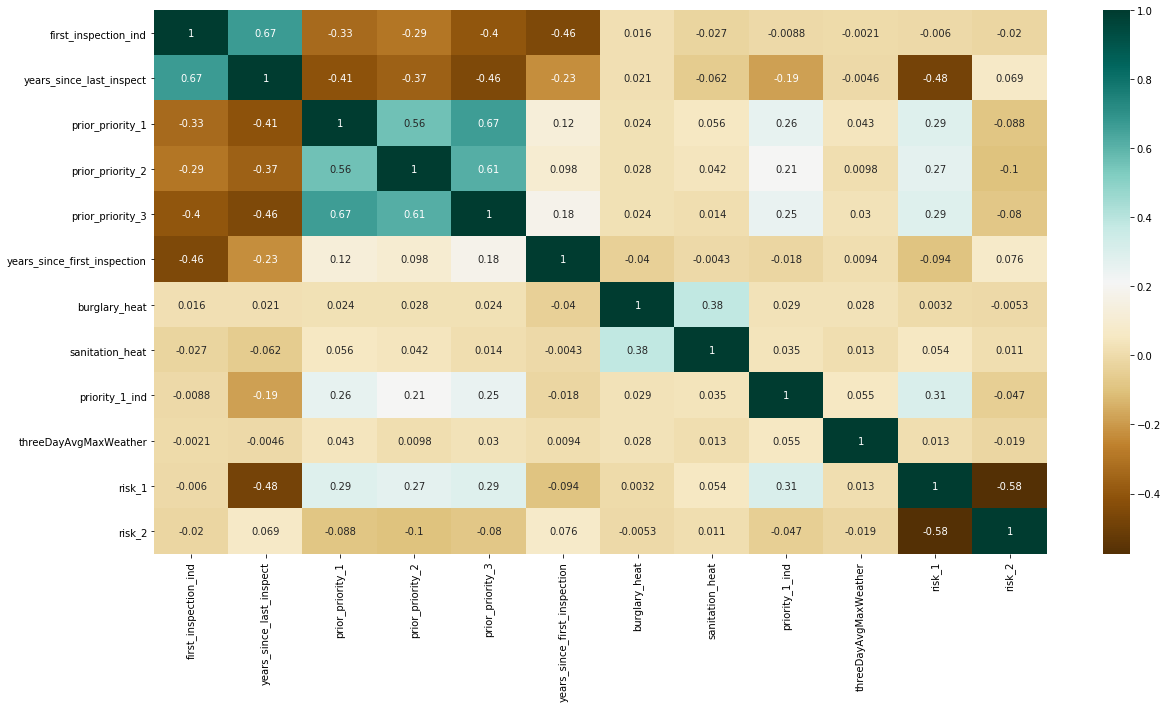

In [341]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= train_test.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [160]:
train_test

,first_inspection_ind,prior_priority_1,prior_priority_2,prior_priority_3,years_since_first_inspection,burglary_heat,sanitation_heat,priority_1_ind,threeDayAvgMaxWeather,risk_1,risk_2,risk_3
date_of_inspection,,,,,,,,,,,,
2014-04-01,False,2.0,0.0,11.0,4.104110,51.493270,367.929306,True,53.666667,1,0,0
2014-04-01,False,0.0,2.0,1.0,6.010959,109.543767,25.443055,True,53.666667,0,0,1
2014-04-01,False,5.0,1.0,8.0,0.978082,83.365610,395.811388,False,53.666667,1,0,0
2014-04-01,True,0.0,0.0,0.0,0.000000,85.507622,73.181792,True,53.666667,1,0,0
2014-04-01,False,2.0,1.0,0.0,4.613699,85.507622,73.181792,False,53.666667,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-29,False,0.0,0.0,2.0,3.953425,16.177687,11.308850,False,56.000000,0,0,1
2019-03-29,False,2.0,2.0,11.0,1.013699,16.900849,18.398057,False,56.000000,1,0,0
2019-03-29,False,1.0,1.0,5.0,0.994521,170.922240,117.796553,False,56.000000,1,0,0


In [357]:
Y=train_test.columns=='priority_1_ind'
Y

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False])

In [358]:
X=(train_test.columns!='priority_1_ind') & (train_test.columns!='date_of_inspection') & (train_test.columns!='inspector_name')
X

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True])

In [359]:
# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    train_test.loc[:,X], train_test.priority_1_ind, test_size=0.2, shuffle=False)

In [377]:
X_train

,first_inspection_ind,years_since_last_inspect,prior_priority_1,prior_priority_2,prior_priority_3,years_since_first_inspection,burglary_heat,sanitation_heat,threeDayAvgMaxWeather,risk_1,risk_2,restaurant_ind
date_of_inspection,,,,,,,,,,,,
2015-08-31,False,0.972603,2.0,0.0,5.0,0.0,64.141226,283.684265,77.000000,0,0,1
2014-07-24,False,1.465753,1.0,0.0,5.0,1.0,128.639533,3.405728,87.333333,0,0,0
2015-08-31,False,0.967123,5.0,0.0,4.0,1.0,125.275112,164.519898,77.000000,1,0,1
2015-10-26,False,0.964384,4.0,2.0,6.0,1.0,112.025336,91.864163,55.666667,1,0,1
2018-12-03,False,1.534247,0.0,0.0,1.0,1.0,26.401012,27.945695,33.666667,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-07,True,2.000000,0.0,0.0,0.0,0.0,114.910038,47.170298,67.666667,0,1,1
2018-10-01,True,2.000000,0.0,0.0,0.0,0.0,133.478150,98.305977,53.333333,0,1,1
2017-01-12,False,1.416438,0.0,1.0,2.0,1.0,208.225378,275.302246,21.666667,0,0,0


In [361]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=20)
# principalComponents = pca.fit_transform(X_train.iloc[:,4:])
# principalDf = pd.DataFrame(data = principalComponents
#               , columns = ['principal component 1', 'principal component 2','principal component 3'])
# principalDf

In [41]:
# pca.explained_variance_ratio_.sum()

0.9320589691796292

In [ ]:
# finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

# exploratory analysis

In [373]:
logReg=sklearn.linear_model.LogisticRegression(max_iter=1000)

In [374]:
logFit=logReg.fit(X_train,y_train)

In [364]:
logFit.coef_

array([[ 5.10875837e-01,  1.41376995e-01,  1.86005178e-01,
         1.18328404e-01,  6.59204448e-02,  3.66578824e-02,
         7.94606840e-04, -1.83735356e-04,  3.78105519e-03,
         5.64523932e-01,  1.83594127e-02,  1.08085321e+00]])

In [365]:
from sklearn.feature_selection import RFE

In [375]:
#no of features
nof_list=np.arange(1,12)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(train_test.loc[:,X], train_test.priority_1_ind, test_size = 0.2, random_state = 0)
    model = logReg
    rfe = RFE(logReg,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 11
Score with 11 features: 0.707151


In [376]:
#Initializing RFE model
rfe = RFE(logReg, nof)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,y_train)  
#Fitting the data to model
logReg.fit(X_rfe,y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True False  True  True  True  True]
[1 1 1 1 1 1 1 2 1 1 1 1]


In [370]:
X_train.columns[rfe.support_]

Index(['first_inspection_ind', 'years_since_last_inspect', 'prior_priority_1',
       'prior_priority_2', 'prior_priority_3', 'years_since_first_inspection',
       'burglary_heat', 'threeDayAvgMaxWeather', 'risk_1', 'risk_2',
       'restaurant_ind'],
      dtype='object')

Text(0.5, 1.0, 'Feature importance using Logistic Regression')

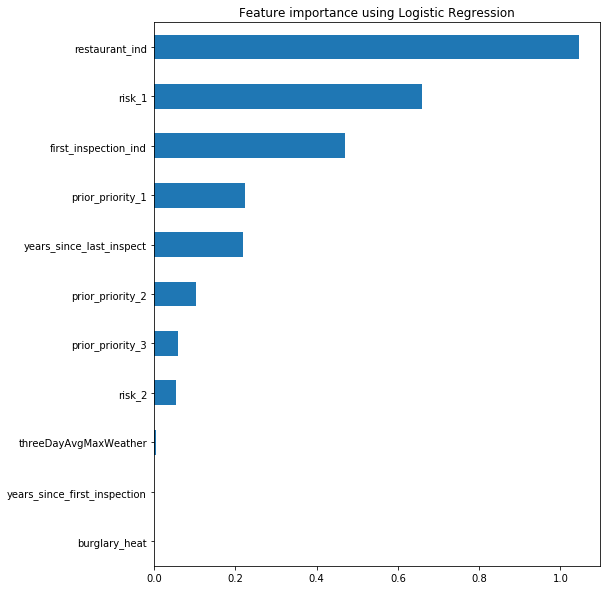

In [371]:
coef=pd.DataFrame(logFit.coef_,columns= X_train.columns[rfe.support_])
coef=coef.T.iloc[:,0]
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Logistic Regression")

In [539]:
from sklearn import feature_selection

In [179]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [372]:
y_pred = logFit.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logFit.score(X_test, y_test)))

ValueError: X has 12 features per sample; expecting 11

Assessment should be based on how many days sooner would critical inspection be found if model was leveraged. Need to create probability assement for each and order based on probability. Need to make sure routine assessment still happens within a ~1 month window?

In [263]:
logFit.predict(X_test)

array([ True, False,  True, ...,  True,  True,  True])

In [222]:
X_test.loc[:,X_test.columns[rfe.support_]]

,first_inspection_ind,prior_priority_1,prior_priority_2,prior_priority_3,years_since_first_inspection,threeDayAvgMaxWeather,risk_1,risk_2,risk_3
date_of_inspection,,,,,,,,,
2015-10-13,False,3.0,1.0,3.0,7.260274,75.000000,1,0,0
2014-06-30,False,0.0,0.0,2.0,2.849315,83.000000,0,0,1
2018-07-26,False,1.0,0.0,1.0,5.693151,84.333333,0,0,1
2016-01-27,False,4.0,0.0,2.0,5.994521,29.333333,1,0,0
2016-05-24,False,0.0,0.0,2.0,8.260274,82.666667,0,1,0
...,...,...,...,...,...,...,...,...,...
2014-04-04,True,0.0,0.0,0.0,0.000000,40.000000,0,0,1
2018-04-10,False,2.0,1.0,4.0,1.000000,34.000000,1,0,0
2017-08-03,True,0.0,0.0,0.0,0.000000,86.000000,1,0,0


In [223]:
predictions=pd.DataFrame(logFit.predict_proba(X_test.loc[:,X_test.columns[rfe.support_]])).iloc[:,1]

In [224]:
predictions

0       0.790932
1       0.302358
2       0.334517
3       0.768894
4       0.494043
          ...   
1757    0.368646
1758    0.737941
1759    0.741652
1760    0.278947
1761    0.861193
Name: 1, Length: 1762, dtype: float64

In [239]:
X_out=X_test.reset_index()

In [240]:
X_out['criticalProb']=predictions

In [241]:
X_out['criticalPred']=y_pred

In [242]:
y_out=y_test.reset_index()

In [243]:
X_out.loc[:,'priority_1_ind']=y_out['priority_1_ind']

In [247]:
X_out

,first_inspection_ind,prior_priority_1,prior_priority_2,prior_priority_3,years_since_first_inspection,burglary_heat,sanitation_heat,threeDayAvgMaxWeather,risk_1,risk_2,risk_3,criticalProb,criticalPred,priority_1_ind
date_of_inspection,,,,,,,,,,,,,,
2015-10-13,False,3.0,1.0,3.0,7.260274,144.600406,18.232503,75.000000,1,0,0,0.790932,True,False
2014-06-30,False,0.0,0.0,2.0,2.849315,19.899356,1.201387,83.000000,0,0,1,0.302358,False,True
2018-07-26,False,1.0,0.0,1.0,5.693151,32.905518,58.435323,84.333333,0,0,1,0.334517,False,False
2016-01-27,False,4.0,0.0,2.0,5.994521,51.255296,191.192302,29.333333,1,0,0,0.768894,True,False
2016-05-24,False,0.0,0.0,2.0,8.260274,18.286421,26.506325,82.666667,0,1,0,0.494043,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-04-04,True,0.0,0.0,0.0,0.000000,69.958667,14.682408,40.000000,0,0,1,0.368646,False,False
2018-04-10,False,2.0,1.0,4.0,1.000000,24.812780,11.873571,34.000000,1,0,0,0.737941,True,True
2017-08-03,True,0.0,0.0,0.0,0.000000,193.580990,184.589295,86.000000,1,0,0,0.741652,True,True


In [249]:
X_out['2019-01-01':'2019-03-31'].to_csv('2019 assessment.csv')

In [251]:
X_out=X_out['2019-01-01':'2019-03-31'].sort_values('criticalProb', ascending=False)

In [255]:
X_out.reset_index().iloc[0:46,]

In [257]:
X_out=X_out.reset_index()

In [262]:
X_out['reassigned_date']=X_out.date_of_inspection.sort_values()

In [271]:
X_out

,date_of_inspection,first_inspection_ind,prior_priority_1,prior_priority_2,prior_priority_3,years_since_first_inspection,burglary_heat,sanitation_heat,threeDayAvgMaxWeather,risk_1,risk_2,risk_3,criticalProb,criticalPred,priority_1_ind,reassigned_date
0,2019-01-03,False,5.0,5.0,12.0,1.016438,245.199773,137.823457,23.000000,1,0,0,0.927918,True,True,2019-01-03
1,2019-03-29,False,4.0,2.0,15.0,3.109589,248.898253,154.780916,56.000000,1,0,0,0.911898,True,True,2019-03-29
2,2019-03-26,False,6.0,3.0,6.0,10.931507,141.367607,200.515513,51.666667,1,0,0,0.905834,True,True,2019-03-26
3,2019-01-23,False,4.0,3.0,13.0,1.002740,105.234616,167.501797,16.333333,1,0,0,0.896811,True,True,2019-01-23
4,2019-02-12,False,5.0,3.0,3.0,10.800000,122.887156,213.645376,17.000000,1,0,0,0.847297,True,True,2019-02-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,2019-02-26,False,0.0,0.0,0.0,1.994521,115.816938,158.700596,21.666667,0,0,1,0.229342,False,False,2019-02-26
89,2019-03-08,False,0.0,0.0,0.0,5.816438,192.372871,93.949898,19.666667,0,0,1,0.224009,False,False,2019-03-08
90,2019-02-19,False,0.0,0.0,0.0,8.991781,27.130347,11.232907,23.333333,0,0,1,0.223507,False,False,2019-02-19
91,2019-02-14,False,0.0,0.0,0.0,9.591781,158.409141,111.525432,23.000000,0,0,1,0.222665,False,False,2019-02-14


In [274]:
X_out['reassigned_date']=X_out['date_of_inspection'].sort_values().reset_index(drop=True)

In [283]:
X_critical=X_out[X_out.priority_1_ind==True]

In [284]:
(X_critical.reassigned_date-X_critical.date_of_inspection).describe()

count                           43
mean     -13 days +03:20:55.813953
std        36 days 02:59:17.477092
min             -85 days +00:00:00
25%             -45 days +12:00:00
50%              -2 days +00:00:00
75%               15 days 00:00:00
max               49 days 00:00:00
dtype: object

In [378]:
from sklearn import ensemble
rf=sklearn.ensemble.RandomForestClassifier(max_depth=4)
rfFit=rf.fit(X_train,y_train)

In [380]:
#no of features
nof_list=np.arange(1,12)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(train_test.loc[:,X], train_test.priority_1_ind, test_size = 0.2, random_state = 0)
    model = rf
    rfe = RFE(rf,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 7
Score with 7 features: 0.711124


In [381]:
#Initializing RFE model
rfe = RFE(rf, nof)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,y_train)  
#Fitting the data to model
rf.fit(X_rfe,y_train)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True  True False False False False  True  True  True]
[4 1 1 1 1 6 3 5 2 1 1 1]


In [382]:
X_train.columns[rfe.support_]

Index(['years_since_last_inspect', 'prior_priority_1', 'prior_priority_2',
       'prior_priority_3', 'risk_1', 'risk_2', 'restaurant_ind'],
      dtype='object')

In [383]:
coef=pd.DataFrame(rf.fit(X_rfe,y_train).coef_,columns= X_train.columns[rfe.support_])
coef=coef.T.iloc[:,0]
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using random forest")

AttributeError: 'RandomForestClassifier' object has no attribute 'coef_'

In [385]:
rf.fit(X_rfe,y_train).feature_importances_

array([0.10228458, 0.14119311, 0.04096652, 0.12446119, 0.25242687,
       0.03014139, 0.30852634])

In [389]:
X_train.columns[rfe.support_]

Index(['years_since_last_inspect', 'prior_priority_1', 'prior_priority_2',
       'prior_priority_3', 'risk_1', 'risk_2', 'restaurant_ind'],
      dtype='object')

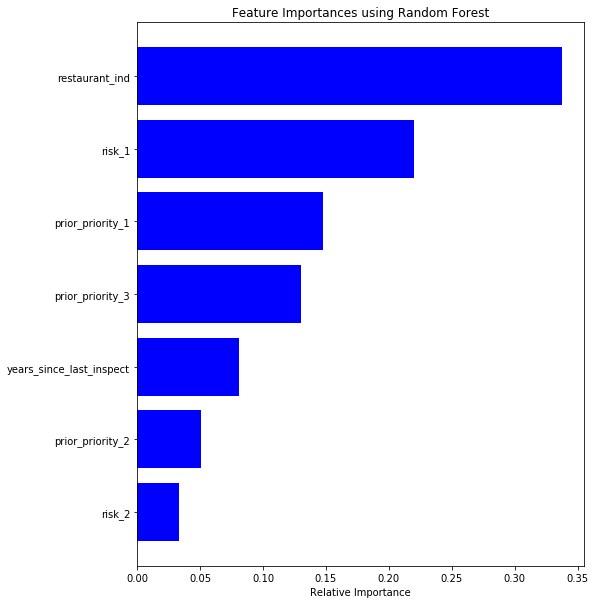

In [391]:
features = X_train.columns[rfe.support_]
importances = rf.fit(X_rfe,y_train).feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances using Random Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [422]:
X_train_rfe

array([[False, 0.9726027397260274, 2.0, ..., 0, 0, 1],
       [False, 1.4657534246575343, 1.0, ..., 0, 0, 0],
       [False, 0.9671232876712329, 5.0, ..., 1, 0, 1],
       ...,
       [False, 1.4164383561643836, 0.0, ..., 0, 0, 0],
       [False, 0.958904109589041, 7.0, ..., 1, 0, 1],
       [False, 0.9643835616438357, 6.0, ..., 1, 0, 1]], dtype=object)

In [394]:
y_pred=rf.fit(X_train_rfe,y_train).predict(X_test_rfe)

print('Accuracy of random forest regression classifier on test set: {:.2f}'.format(rf.score(X_test_rfe, y_test)))

Accuracy of random forest regression classifier on test set: 0.71


In [400]:
train_test

,first_inspection_ind,years_since_last_inspect,prior_priority_1,prior_priority_2,prior_priority_3,years_since_first_inspection,burglary_heat,sanitation_heat,priority_1_ind,threeDayAvgMaxWeather,risk_1,risk_2,restaurant_ind
date_of_inspection,,,,,,,,,,,,,
2014-04-01,False,0.956164,2.0,0.0,11.0,1.0,51.493270,367.929306,True,53.666667,1,0,1
2014-04-01,False,1.890411,0.0,2.0,1.0,1.0,109.543767,25.443055,True,53.666667,0,0,0
2014-04-01,False,0.978082,5.0,1.0,8.0,0.0,83.365610,395.811388,False,53.666667,1,0,1
2014-04-01,True,2.000000,0.0,0.0,0.0,0.0,85.507622,73.181792,True,53.666667,1,0,1
2014-04-01,False,0.649315,2.0,1.0,0.0,1.0,85.507622,73.181792,False,53.666667,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-29,False,2.000000,0.0,0.0,2.0,0.0,16.177687,11.308850,False,56.000000,0,0,0
2019-03-29,False,1.013699,2.0,2.0,11.0,0.0,16.900849,18.398057,False,56.000000,1,0,1
2019-03-29,False,0.994521,1.0,1.0,5.0,0.0,170.922240,117.796553,False,56.000000,1,0,1


In [416]:
evaluate_y=evaluate.loc[:,'priority_1_ind']
evaluate_x=evaluate.loc[:,(evaluate.columns!='priority_1_ind')]

In [419]:
evaluate_x

,first_inspection_ind,years_since_last_inspect,prior_priority_1,prior_priority_2,prior_priority_3,years_since_first_inspection,burglary_heat,sanitation_heat,threeDayAvgMaxWeather,risk_1,risk_2,restaurant_ind
date_of_inspection,,,,,,,,,,,,
2019-04-01,True,2.000000,0.0,0.0,0.0,0.0,30.543038,79.230369,41.000000,1,0,1
2019-04-01,False,0.989041,1.0,0.0,6.0,1.0,70.342719,136.317198,41.000000,1,0,1
2019-04-01,False,0.997260,0.0,0.0,0.0,1.0,43.592450,151.957405,41.000000,1,0,1
2019-04-02,False,1.030137,1.0,0.0,7.0,1.0,106.180194,237.121846,40.333333,1,0,1
2019-04-02,False,1.024658,1.0,2.0,1.0,0.0,130.014682,237.720211,40.333333,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-30,False,1.024658,0.0,2.0,1.0,1.0,51.318936,12.863814,35.333333,1,0,1
2019-12-31,False,0.986301,2.0,0.0,2.0,1.0,96.338191,149.002266,37.000000,1,0,1
2019-12-31,True,2.000000,0.0,0.0,0.0,0.0,47.550742,23.036917,37.000000,1,0,1


In [ ]:
evaluate
rf.fit(X_train_rfe,y_train).predict(evaluate)
rfe.transform(X_train,y_train)

In [412]:
evaluate_y=evaluate.loc[:,'priority_1_ind']
evaluate_x_rfe=evaluate_x.loc[:,evaluate_x.columns[rfe.support_]]

In [431]:
train_x=X_train.loc[:,X_train.columns[rfe.support_]]
train_y=y_train

In [433]:
rfEval=rf.fit(train_x,train_y)

In [466]:
y_pred=rf.fit(train_x,train_y).predict(evaluate_x_rfe)

print('Accuracy of random forest regression classifier on eval set: {:.2f}'.format(rf.score(evaluate_x_rfe, evaluate_y)))

Accuracy of random forest regression classifier on eval set: 0.68


In [443]:
predictions=rfEval.predict(evaluate_x_rfe)

In [442]:
y_prob=pd.DataFrame(rfEval.predict_proba(evaluate_x_rfe)).iloc[:,1]

In [444]:
X_out=evaluate_x_rfe.reset_index()

In [445]:
X_out['criticalProb']=y_prob

In [446]:
X_out['criticalPred']=predictions

In [447]:
y_out=evaluate_y.reset_index()

In [448]:
X_out.loc[:,'priority_1_ind']=y_out['priority_1_ind']

In [449]:
X_out

,date_of_inspection,years_since_last_inspect,prior_priority_1,prior_priority_2,prior_priority_3,risk_1,risk_2,restaurant_ind,criticalProb,criticalPred,priority_1_ind
0,2019-04-01,2.000000,0.0,0.0,0.0,1,0,1,0.702093,True,True
1,2019-04-01,0.989041,1.0,0.0,6.0,1,0,1,0.736103,True,True
2,2019-04-01,0.997260,0.0,0.0,0.0,1,0,1,0.634787,True,True
3,2019-04-02,1.030137,1.0,0.0,7.0,1,0,1,0.742534,True,True
4,2019-04-02,1.024658,1.0,2.0,1.0,1,0,1,0.709022,True,True
...,...,...,...,...,...,...,...,...,...,...,...
1290,2019-12-30,1.024658,0.0,2.0,1.0,1,0,1,0.657345,True,False
1291,2019-12-31,0.986301,2.0,0.0,2.0,1,0,1,0.709061,True,True
1292,2019-12-31,2.000000,0.0,0.0,0.0,1,0,1,0.702093,True,True
1293,2019-12-31,1.495890,0.0,0.0,0.0,0,0,0,0.252691,False,False


In [450]:
X_out.to_csv('2019-04-01 assessment.csv')

In [454]:
X_out=X_out.set_index('date_of_inspection').sort_values('criticalProb', ascending=False)

In [455]:
X_out

,years_since_last_inspect,prior_priority_1,prior_priority_2,prior_priority_3,risk_1,risk_2,restaurant_ind,criticalProb,criticalPred,priority_1_ind
date_of_inspection,,,,,,,,,,
2019-06-25,1.000000,8.0,4.0,18.0,1,0,1,0.875434,True,True
2019-07-16,0.953425,4.0,4.0,12.0,1,0,1,0.874484,True,True
2019-04-10,1.032877,7.0,4.0,12.0,1,0,1,0.874382,True,False
2019-12-26,0.994521,6.0,4.0,12.0,1,0,1,0.873937,True,True
2019-09-13,1.000000,6.0,5.0,22.0,1,0,1,0.873873,True,True
...,...,...,...,...,...,...,...,...,...,...
2019-08-27,1.893151,0.0,0.0,0.0,0,0,0,0.243765,False,False
2019-09-09,1.893151,0.0,0.0,0.0,0,0,0,0.243765,False,False
2019-10-30,1.920548,0.0,0.0,0.0,0,0,0,0.240690,False,False


In [456]:
X_out.reset_index().iloc[0:647,]

,date_of_inspection,years_since_last_inspect,prior_priority_1,prior_priority_2,prior_priority_3,risk_1,risk_2,restaurant_ind,criticalProb,criticalPred,priority_1_ind
0,2019-06-25,1.000000,8.0,4.0,18.0,1,0,1,0.875434,True,True
1,2019-07-16,0.953425,4.0,4.0,12.0,1,0,1,0.874484,True,True
2,2019-04-10,1.032877,7.0,4.0,12.0,1,0,1,0.874382,True,False
3,2019-12-26,0.994521,6.0,4.0,12.0,1,0,1,0.873937,True,True
4,2019-09-13,1.000000,6.0,5.0,22.0,1,0,1,0.873873,True,True
...,...,...,...,...,...,...,...,...,...,...,...
642,2019-05-21,0.994521,0.0,1.0,6.0,1,0,1,0.699309,True,True
643,2019-10-16,0.991781,0.0,1.0,6.0,1,0,1,0.699309,True,True
644,2019-08-16,0.945205,1.0,1.0,0.0,1,0,1,0.699094,True,False
645,2019-06-18,1.008219,0.0,1.0,6.0,1,0,1,0.698557,True,False


In [459]:
X_out=X_out.reset_index()

In [460]:
X_out['reassigned_date']=X_out.date_of_inspection.sort_values()

In [463]:
X_out

,date_of_inspection,years_since_last_inspect,prior_priority_1,prior_priority_2,prior_priority_3,risk_1,risk_2,restaurant_ind,criticalProb,criticalPred,priority_1_ind,reassigned_date
0,2019-06-25,1.000000,8.0,4.0,18.0,1,0,1,0.875434,True,True,2019-04-01
1,2019-07-16,0.953425,4.0,4.0,12.0,1,0,1,0.874484,True,True,2019-04-01
2,2019-04-10,1.032877,7.0,4.0,12.0,1,0,1,0.874382,True,False,2019-04-01
3,2019-12-26,0.994521,6.0,4.0,12.0,1,0,1,0.873937,True,True,2019-04-02
4,2019-09-13,1.000000,6.0,5.0,22.0,1,0,1,0.873873,True,True,2019-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...
1290,2019-08-27,1.893151,0.0,0.0,0.0,0,0,0,0.243765,False,False,2019-12-30
1291,2019-09-09,1.893151,0.0,0.0,0.0,0,0,0,0.243765,False,False,2019-12-31
1292,2019-10-30,1.920548,0.0,0.0,0.0,0,0,0,0.240690,False,False,2019-12-31
1293,2019-10-29,1.915068,0.0,0.0,0.0,0,0,0,0.240306,False,False,2019-12-31


In [462]:
X_out['reassigned_date']=X_out['date_of_inspection'].sort_values().reset_index(drop=True)

In [464]:
X_critical=X_out[X_out.priority_1_ind==True]

In [465]:
(X_critical.reassigned_date-X_critical.date_of_inspection).describe()

count                          773
mean     -27 days +23:32:03.415265
std        98 days 12:47:30.118810
min            -268 days +00:00:00
25%             -96 days +00:00:00
50%             -31 days +00:00:00
75%               37 days 00:00:00
max              252 days 00:00:00
dtype: object

In [470]:
tn, fp, fn, tp = confusion_matrix.ravel()

In [474]:
fp

364

In [438]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(evaluate_y, rfEval.predict(evaluate_x_rfe))
print(confusion_matrix)

[[158 364]
 [ 51 722]]


In [ ]:
confusion_matrix.

In [440]:
from sklearn.metrics import classification_report
print(classification_report(evaluate_y, rfEval.predict(evaluate_x_rfe)))

              precision    recall  f1-score   support

       False       0.76      0.30      0.43       522
        True       0.66      0.93      0.78       773

    accuracy                           0.68      1295
   macro avg       0.71      0.62      0.60      1295
weighted avg       0.70      0.68      0.64      1295



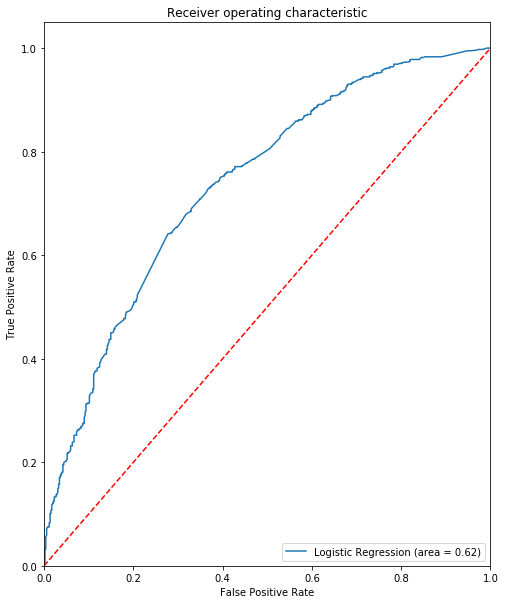

In [475]:
import matplotlib
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(evaluate_y, rfEval.predict(evaluate_x_rfe))
fpr, tpr, thresholds = roc_curve(evaluate_y, rfEval.predict_proba(evaluate_x_rfe)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
>>> y_true = [0, 0, 0, 1, 1, 1, 1, 1]
>>> y_pred = [0, 1, 0, 1, 0, 1, 0, 1]
>>> confusion_matrix(y_true, y_pred, normalize='all')
array([[0.25 , 0.125],
       [0.25 , 0.375]])